<a href="https://colab.research.google.com/github/VisheshManav/mlzoomcamp-cohort-2022/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**Linear Regression Homework**\
Link to [Homework 2 Questions](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/02-regression/homework.md)\
Link to [California Housing Prices Dataset](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv)\
Link to [mlzoomcamp course](https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
df = pd.read_csv(data)
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


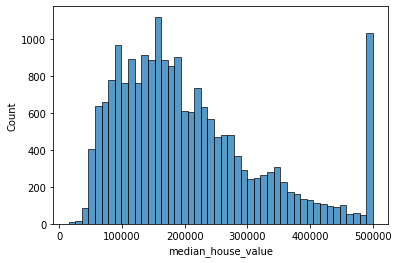

In [4]:
sns.histplot(df.median_house_value)

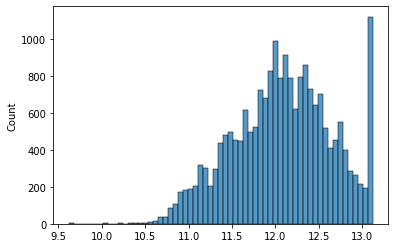

In [5]:
sns.histplot(np.log1p(df.median_house_value.values))

In [6]:
df.drop('ocean_proximity', axis=1, inplace=True)

##Q1
> Ans: 207

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Q2
> Ans: 1166

In [8]:
df['population'].median()

1166.0

### Functions:

In [9]:
def train_val_test_split(df, random_state=2):
  np.random.seed(random_state)
  n = len(df)

  n_val = int(0.2 * n)
  n_test = int(0.2 * n)
  n_train = n - (n_val + n_test)

  idx = np.arange(n)
  np.random.shuffle(idx)
  df_shuffled = df.iloc[idx]

  df_train = df_shuffled.iloc[:n_train].copy().reset_index(drop=True)
  df_val = df_shuffled.iloc[n_train:n_train+n_val].copy().reset_index(drop=True)
  df_test = df_shuffled.iloc[n_train+n_val:].copy().reset_index(drop=True)

  y_train = np.log1p(df_train['median_house_value'].values)
  y_val = np.log1p(df_val['median_house_value'].values)
  y_test = np.log1p(df_test['median_house_value'].values)

  del df_train['median_house_value']
  del df_val['median_house_value']
  del df_test['median_house_value']

  return (df_train, df_val, df_test, y_train, y_val, y_test)

In [10]:
def train_linear_regression(X, y, r=0.0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  reg = r * np.eye(XTX.shape[0])
  XTX = XTX + reg

  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0], w[1:]

In [11]:
def fillna_zero(df):
  df_num = df.fillna(0)
  X = df_num.values
  return X

def fillna_mean(df):
  df_num = df.fillna({col:df[col].mean() for col in df.columns})
  X = df_num.values
  return X

In [12]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Q3
> Ans: Both are equally good

In [13]:
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(df, random_state=42)


wz_0, wz = train_linear_regression(fillna_zero(df_train), y_train)
wm_0, wm = train_linear_regression(fillna_mean(df_train), y_train)

In [14]:
X_val_zero = fillna_zero(df_val)
X_val_mean = fillna_mean(df_val)

y_pred_zero = wz_0 + X_val_zero.dot(wz)
y_pred_mean = wm_0 + X_val_mean.dot(wm)

error_zero = rmse(y_val, y_pred_zero)
error_mean = rmse(y_val, y_pred_mean)

round(error_zero, 2), round(error_mean, 2)

(0.33, 0.33)

### Q4
> Ans: 0

In [15]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
error_values = {}
for r in r_values:
  w_0, w = train_linear_regression(fillna_zero(df_train), y_train, r=r)
  X_val = fillna_zero(df_val)
  y_pred = w_0 + X_val.dot(w)
  error = rmse(y_val, y_pred)
  error_values[r] = round(error, 2)

error_values[0], error_values[0.000001], error_values[0.001], error_values[0.0001]

(0.33, 0.33, 0.33, 0.33)

### Q5
> Ans: 0.005

In [16]:
seeds = range(10)
error_values = []
for seed in seeds:
  df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(df, random_state=seed)
  w_0, w = train_linear_regression(fillna_zero(df_train), y_train)
  X_val = fillna_zero(df_val)
  y_pred = w_0 + X_val.dot(w)
  error = round(rmse(y_val, y_pred), 2)
  error_values.append(error)

np.round(np.std(error_values), 3)

0.005

### Q6
> Ans: 0.35

In [17]:
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(df, random_state=9)
df_train_val = pd.concat([df_train, df_val], axis=0).reset_index(drop=True)
y_train_val = np.concatenate([y_train, y_val], axis=0)
X_train_val = fillna_zero(df_train_val)

w_0, w = train_linear_regression(X_train_val, y_train_val, r=0.001)
X_test = fillna_zero(df_test)
y_pred = w_0 + X_test.dot(w)
round(rmse(y_test, y_pred), 2)


0.35